In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def click_event(event, x, y, flags, params):
    # Checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        # Displaying the coordinates on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' + str(y), (x,y), font, 0.5, (255, 0, 0), 2)
        cv2.imshow('image', img)
        # Adding the point to the list
        points.append((x, y))

# Function to display an image and capture points clicked by the user
def select_points(image_path):
    global img, points
    points = []
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # scale cv2 window
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    # cv2.resizeWindow('image', 800, 600)
    # Displaying the image
    cv2.imshow('image', img)
    cv2.setMouseCallback('image', click_event)
    # wait key q to exit
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
    
    return points
def handle_build_homomatrix(bev_mage_path, cctv_image_path):

    points_cctv = select_points(cctv_image_path)
    points_map = select_points(bev_mage_path)
    print("points_cctv: ", points_cctv)
    print("points_map: ", points_map)
    if len(points_cctv) != len(points_map):
        raise Exception("Size of points_cctv and points_map must be the same")
    points_cctv = np.float32(points_cctv)
    points_map = np.float32(points_map)
    # Calculate Homography
    H, status = cv2.findHomography(points_cctv, points_map)
    print("Homography Matrix for cam:", repr(np.array(H)))
    # visualize points_cctv and map image 
    frame_cctv = cv2.imread(cctv_image_path)
    bev_image = cv2.imread(bev_mage_path)
    
    for i, point in enumerate(points_cctv):
        cv2.circle(frame_cctv, (int(point[0]), int(point[1])), 20, (255,0, 0), -1)
        cv2.putText(frame_cctv, str(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 5)
    for i, point in enumerate(points_map):
        cv2.circle(bev_image, (int(point[0]), int(point[1])), 20, (255, 0, 0), -1)
        cv2.putText(bev_image, str(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
    
    # Check if the images are not the same size, then resize to according width
    if frame_cctv.shape[1] != bev_image.shape[1]:
        width = frame_cctv.shape[1]
        height = int(bev_image.shape[0] * width / bev_image.shape[1])
        bev_image = cv2.resize(bev_image, (width, height))
    # vstack 2 images
    vstack_image = np.vstack((frame_cctv, bev_image))
    # Stretch plot auto fit with window
    plt.figure(figsize=(15, 15))
    plt.imshow(vstack_image)

2024-10-06 15:00:19.090 python[41060:649880] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-06 15:00:19.090 python[41060:649880] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


points_cctv:  [(10, 649), (197, 566), (410, 460), (592, 409), (752, 323), (847, 859), (998, 682), (1109, 504), (1180, 430), (1236, 349), (299, 738), (536, 601), (724, 499), (822, 447), (947, 376)]
points_map:  [(280, 164), (247, 170), (210, 179), (174, 187), (132, 196), (276, 106), (251, 111), (221, 119), (190, 122), (144, 133), (283, 136), (257, 142), (224, 157), (186, 165), (153, 167)]
Homography Matrix for cam: array([[-1.57284657e-01, -3.31660226e+00,  8.51876880e+02],
       [ 1.31452704e-01, -4.87076251e-01, -4.78520093e+02],
       [-1.12704092e-03, -8.81721794e-03,  1.00000000e+00]])


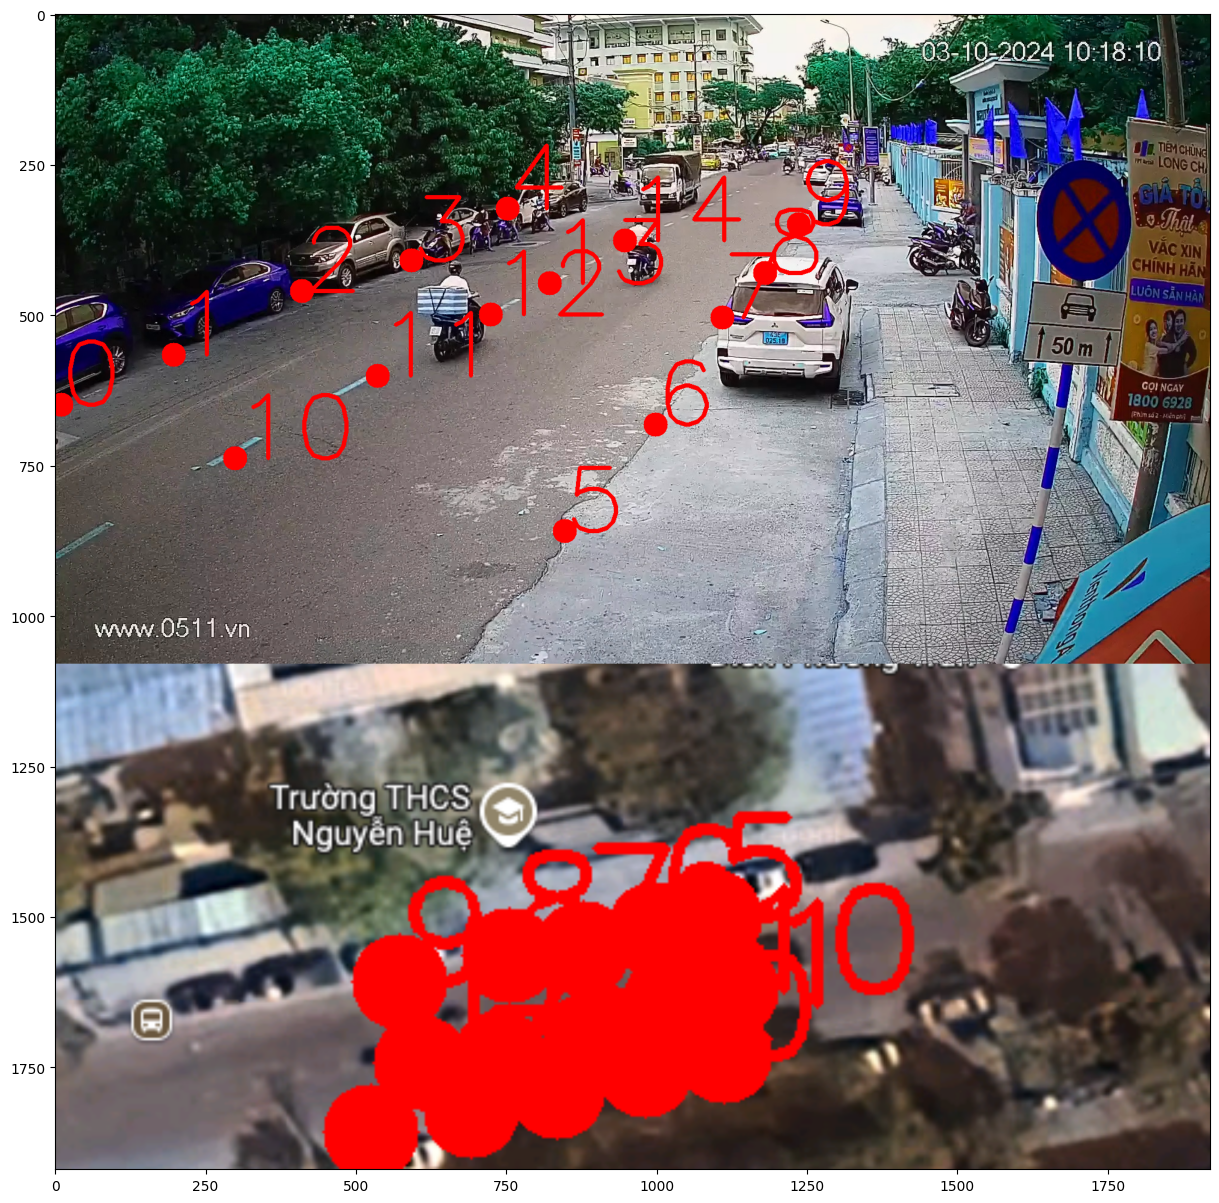

In [2]:
bev_image_path = './img/bv_c_bev.png'
cctv_image_path = './img/cam_bv_c.jpg'
handle_build_homomatrix(bev_image_path, cctv_image_path)

In [3]:
np_homo = np.array([[-1.57284657e-01, -3.31660226e+00,  8.51876880e+02],
       [ 1.31452704e-01, -4.87076251e-01, -4.78520093e+02],
       [-1.12704092e-03, -8.81721794e-03,  1.00000000e+00]])

np_homo.tolist()

[[-0.157284657, -3.31660226, 851.87688],
 [0.131452704, -0.487076251, -478.520093],
 [-0.00112704092, -0.00881721794, 1.0]]